In [1]:
import sys
sys.path.append('..')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats

from lib import *


In [7]:
proteomes = load_proteomes()
human = datadir + proteomes.loc['Human']['path']

In [8]:
df = counter_to_df(count_kmers_proteome(human, 1), norm=True)
df2 = counter_to_df(count_kmers_proteome(human, 2), norm=True)

In [62]:
def jsd(p, q, base=2):
    m = (p + q) / 2.0
    return (scipy.stats.entropy(p, m, base=base) + scipy.stats.entropy(q, m, base=base)) / 2.0

In [70]:
round_to_n = lambda x, n: round(x, -int(np.floor(np.log10(x))) + (n - 1))

def dkl(path): 
    dfp = counter_to_df(count_kmers_proteome(path, 1), norm=True)
    dfmerged = pd.merge(df, dfp, on='seq', suffixes=['_human', '_pathogen'])

    h = np.asarray(dfmerged['freq_human'])
    p = np.asarray(dfmerged['freq_pathogen'])

    dkl_pu = np.log2(20) - scipy.stats.entropy(dfp['freq'], base=2)
    dkl_hu = np.log2(20) - scipy.stats.entropy(df['freq'], base=2)
    dkl_ph = scipy.stats.entropy(p, qk=h, base=2)
    dkl_hp = scipy.stats.entropy(h, qk=p, base=2)
    #jsd_ = jsd(p, h)
    return dkl_hu, dkl_pu, dkl_ph, dkl_hp#, jsd_

Text(0.5, 1.0, 'InfluenzaA')

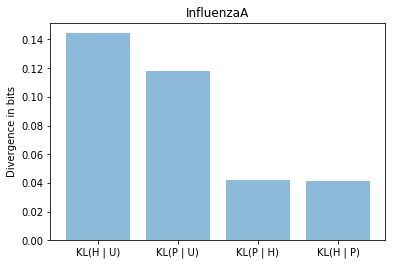

In [87]:
name = 'InfluenzaA'
dkls =  dkl(datadir + proteomes.loc[name]['path'])
objects = ('KL(H | U)', 'KL(P | U)', 'KL(P | H)', 'KL(H | P)')#, 'JSD(P | H)')
y_pos = np.arange(len(objects))
plt.bar(y_pos, dkls, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Divergence in bits')
plt.title(name)